# Implementing the Enigma machine in python

In [1]:
import string

Reflector: A  
Rotors: I, II, III  
Plugboard: A-R, G-K, O-X  
Message: A -> X  

Let's start with a simplier version without a key and roter position:

In [2]:
class Keyboard:
    
    # converting letters into a signal
    def forward(self,letter):
        signal = string.ascii_uppercase.find(letter)
        return signal
    
    #converting signal into a letter
    def backward(self,signal):
        letter = string.ascii_uppercase[signal]
        return letter

### We get the signal of the chosen letter

In [3]:
k = Keyboard()
print(k.forward("A"))

0


### We get the letter from the signal

In [4]:
print(k.backward(0))

A


# Plugboard - swapping letters

In [5]:
class Plugboard:
    def __init__(self, pairs):
        self.left = string.ascii_uppercase
        self.right = string.ascii_uppercase
        for pair in pairs:
            A = pair[0]
            B = pair[1]
            pos_A = self.left.find(A)
            pos_B = self.left.find(B)
            self.left = self.left[:pos_A] + B + self.left[pos_A+1:]
            self.left = self.left[:pos_B] + A + self.left[pos_B+1:]
            
    def forward(self, signal):
        letter = self.right[signal]
        signal = self.left.find(letter)
        return signal
    
    def backward(self, signal):
        letter = self.left[signal]
        signal = self.right.find(letter)
        return signal

### We want to swap A with F and C with R

In [6]:
p = Plugboard(["AF", "CR"])
print(p.left) #new alphabet
print(p.right) #regular alphabet
print(p.forward(0)) #we give 0=A, A gets swapped with F, so we should get the index of F -> 5
print(p.forward(2)) #we give 2=C, C gets swapped with R, so we should get the index of R -> 17
print(p.forward(1)) #we give 1=B, B does not get swapped, so we should get the same index -> 1

FBRDEAGHIJKLMNOPQCSTUVWXYZ
ABCDEFGHIJKLMNOPQRSTUVWXYZ
5
17
1


# Rotors

### Left side - regular alphabet
### Right side - scrambled alphabet

This time I do not just swap two letters, I want to scramble the whole alphabet based on our wiring.  I want to use the wiring that has been used in enigma in Natzi Germany, so I base it on the tables that can be found on [Wikipedia](https://en.wikipedia.org/wiki/Enigma_rotor_details#Rotor_wiring_tables)

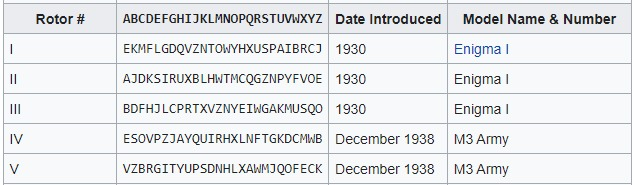

Each Rotor has a motion mechanism that is being triggered when we pass a letter. Once again I use the information from Wikipedia:

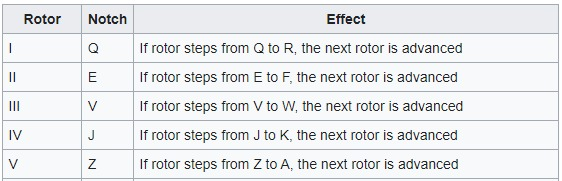

Later on more advanced rotors have been introduced that had two turnover notches. For the purpose of this exercise I will stick to the original ones with juist one notch.

In [7]:
class Rotor:
    
    def __init__(self, wiring, notch):
        self.left = string.ascii_uppercase
        self.right = wiring
        self.notch = notch
    
    def forward(self, signal):
        letter = self.right[signal]
        signal = self.left.find(letter)
        return signal
    
    def backward(self, signal):
        letter = self.left[signal]
        signal = self.right.find(letter)
        return signal
        
I = Rotor("EKMFLGDQVZNTOWYHXUSPAIBRCJ", "Q")
II = Rotor("AJDKSIRUXBLHWTMCQGZNPYFVOE", "E")
III = Rotor("BDFHJLCPRTXVZNYEIWGAKMUSQO", "V")
IV = Rotor("ESOVPZJAYQUIRHXLNFTGKDCMWB", "J")
V = Rotor("VZBRGITYUPSDNHLXAWMJQOFECK", "Z")

### Testing the rotors - no rotation

Let's try the third rotor and pass the letter A (signal=0) and J (signal=9).  
Based on the wiring we should get B (signal=1) and T (signal=19).

In [8]:
print(III.forward(0))
print(III.forward(9))

1
19


# Reflector

The reflector connected outputs of the last rotor in pairs, redirecting current back through the rotors by a different route. The reflector ensured that Enigma could be encrypted and decrypted on two different machines, without the need for a mechanism to switch between encryption and decryption modes.

Once again, I am using the settings from Wikipedia:

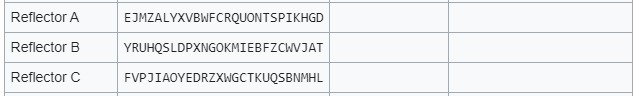

In [9]:
class Reflector:
    
    def __init__(self, wiring):
        self.left = string.ascii_uppercase
        self.right = wiring
    
    
    def reflect(self, signal):
        letter = self.right[signal]
        signal = self.left.find(letter)
        return signal

In [10]:
A = Reflector("EJMZALYXVBWFCRQUONTSPIKHGD")
B = Reflector("YRUHQSLDPXNGOKMIEBFZCWVJAT")
C = Reflector("FVPJIAOYEDRZXWGCTKUQSBNMHL")

# Encryption of a letter

Let's Encrypt the letter "A".  
We want to swap letters: A with R, G with K, and O with X.
We choose the rotors III, II, I

In [11]:
KB = Keyboard()
PB = Plugboard(["AR", "GK", "OX"])

letter = "A"
print(f"The given letter is {letter}.")
signal = KB.forward(letter)
print(f"The signal for the selected letter is {signal}.")
signal = PB.forward(signal)
print(f"The signal for the letter swapped by a plugboard is {signal}.")
signal = III.forward(signal)
print(f"The signal for the selected rotor III is {signal}.")
signal = II.forward(signal)
print(f"The signal for the selected rotor II is {signal}.")
signal = I.forward(signal)
print(f"The signal for the selected rotor I is {signal}.")
signal = A.reflect(signal)
print(f"The signal for the selected reflector A is {signal}.")

The given letter is A.
The signal for the selected letter is 0.
The signal for the letter swapped by a plugboard is 17.
The signal for the selected rotor III is 22.
The signal for the selected rotor II is 5.
The signal for the selected rotor I is 6.
The signal for the selected reflector A is 24.


Then, we go back:

In [12]:
signal = I.backward(signal)
print(f"The backward signal for the selected rotor I is {signal}.")
signal = II.backward(signal)
print(f"The backward signal for the selected rotor II is {signal}.")
signal = III.backward(signal)
print(f"The backward signal for the selected rotor III is {signal}.")
signal = PB.backward(signal)
print(f"The backward signal for the letter swapped by a plugboard is {signal}.")
letter = KB.backward(signal)
print(f"The backward encrypted letter is {letter}.")

The backward signal for the selected rotor I is 14.
The backward signal for the selected rotor II is 24.
The backward signal for the selected rotor III is 14.
The backward signal for the letter swapped by a plugboard is 23.
The backward encrypted letter is X.


The entire path can be followed here:

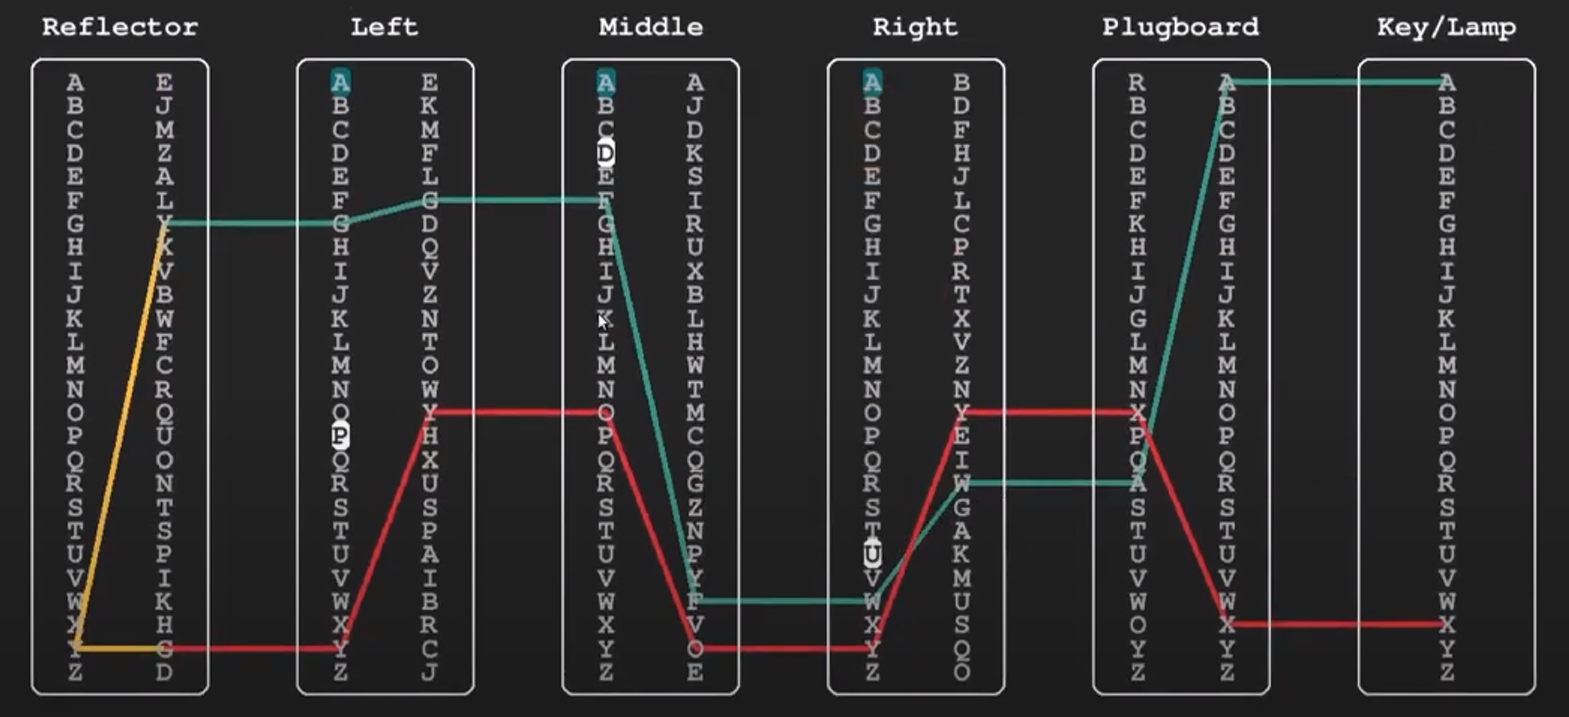

# Moving the rotors

Right now my rotors do not move, so every time we pressed the letter A, the output would be the same. To change that, I introduce the rotation system.

In [13]:
class Rotor:
    
    def __init__(self, wiring, notch):
        self.left = string.ascii_uppercase
        self.right = wiring
        self.notch = notch
    
    def forward(self, signal):
        letter = self.right[signal]
        signal = self.left.find(letter)
        return signal
    
    def backward(self, signal):
        letter = self.left[signal]
        signal = self.right.find(letter)
        return signal
    
    def show(self):
        print(self.left)
        print(self.right)
        print("")
    
    def rotate(self):
        self.left = self.left[1:] + self.left[0]
        self.right = self.right[1:] + self.right[0]
        
I = Rotor("EKMFLGDQVZNTOWYHXUSPAIBRCJ", "Q")
II = Rotor("AJDKSIRUXBLHWTMCQGZNPYFVOE", "E")
III = Rotor("BDFHJLCPRTXVZNYEIWGAKMUSQO", "V")
IV = Rotor("ESOVPZJAYQUIRHXLNFTGKDCMWB", "J")
V = Rotor("VZBRGITYUPSDNHLXAWMJQOFECK", "Z")

## Let's see how the rotation works

In [14]:
I.show()
I.rotate()
I.show()

ABCDEFGHIJKLMNOPQRSTUVWXYZ
EKMFLGDQVZNTOWYHXUSPAIBRCJ

BCDEFGHIJKLMNOPQRSTUVWXYZA
KMFLGDQVZNTOWYHXUSPAIBRCJE



# The initial position of the rotors

At the beginning the german officer would set the initial position of the rotors.

In [15]:
class Rotor:
    
    def __init__(self, wiring, notch):
        self.left = string.ascii_uppercase
        self.right = wiring
        self.notch = notch
    
    def forward(self, signal):
        letter = self.right[signal]
        signal = self.left.find(letter)
        return signal
    
    def backward(self, signal):
        letter = self.left[signal]
        signal = self.right.find(letter)
        return signal
    
    def show(self):
        print(self.left)
        print(self.right)
        print("")
    
    def rotate(self, n=1):
        for i in range(n):
            # first letter at the back
            self.left = self.left[1:] + self.left[0]
            self.right = self.right[1:] + self.right[0]

                
    def rotate_to_letter(self, letter):
        # n is the number of rotations
        n = string.ascii_uppercase.find(letter)
        self.rotate(n)
        
        
I = Rotor("EKMFLGDQVZNTOWYHXUSPAIBRCJ", "Q")
II = Rotor("AJDKSIRUXBLHWTMCQGZNPYFVOE", "E")
III = Rotor("BDFHJLCPRTXVZNYEIWGAKMUSQO", "V")
IV = Rotor("ESOVPZJAYQUIRHXLNFTGKDCMWB", "J")
V = Rotor("VZBRGITYUPSDNHLXAWMJQOFECK", "Z")

In [16]:
I.show()
I.rotate_to_letter("G")
I.show()

ABCDEFGHIJKLMNOPQRSTUVWXYZ
EKMFLGDQVZNTOWYHXUSPAIBRCJ

GHIJKLMNOPQRSTUVWXYZABCDEF
DQVZNTOWYHXUSPAIBRCJEKMFLG



# The final enigma

historical settings:

In [17]:
A = Reflector("EJMZALYXVBWFCRQUONTSPIKHGD")
B = Reflector("YRUHQSLDPXNGOKMIEBFZCWVJAT")
C = Reflector("FVPJIAOYEDRZXWGCTKUQSBNMHL")
I = Rotor("EKMFLGDQVZNTOWYHXUSPAIBRCJ", "Q")
II = Rotor("AJDKSIRUXBLHWTMCQGZNPYFVOE", "E")
III = Rotor("BDFHJLCPRTXVZNYEIWGAKMUSQO", "V")
IV = Rotor("ESOVPZJAYQUIRHXLNFTGKDCMWB", "J")
V = Rotor("VZBRGITYUPSDNHLXAWMJQOFECK", "Z")

In [18]:
class Enigma:
    
    def __init__(self, ref, r1, r2, r3, pb, kb):
        self.ref = ref
        self.r1 = r1
        self.r2 = r2
        self.r3 = r3
        self.pb = pb
        self.kb = kb
    
    # setting the key of the enigma
    def set_key(self, key): #key would be a 3-letter string
        self.r1.rotate_to_letter(key[0])
        self.r2.rotate_to_letter(key[1])
        self.r3.rotate_to_letter(key[2])
    
    def encipher(self, letter):
        # rotating the rotors
        # when the first rotor does the whole rotation the next one rotates, and then the next
        # when all rotors are in the top position, all roters rotate:
        if self.r2.left[0] == self.r2.notch and self.r3.left[0] == self.r3.notch:
            self.r1.rotate()
            self.r2.rotate()
            self.r3.rotate()
        # this is specific to the german enigma, when the second roter was in the top position
        # for some reason, all of them would rotate as well - just a machine's perk called
        # DOUBLE STEP ANOMALY
        elif self.r2.left[0] == self.r2.notch:
            self.r1.rotate()
            self.r2.rotate()
            self.r3.rotate()
        elif self.r3.left[0] == self.r3.notch:
            self.r2.rotate()
            self.r3.rotate()
        else:
            self.r3.rotate()
        # passing the signal through the machine
        signal = self.kb.forward(letter)
        signal = self.pb.forward(signal)
        signal = self.r3.forward(signal)
        signal = self.r2.forward(signal)
        signal = self.r1.forward(signal)
        signal = self.ref.reflect(signal)
        signal = self.r1.backward(signal)
        signal = self.r2.backward(signal)
        signal = self.r3.backward(signal)
        signal = self.pb.backward(signal)
        letter = self.kb.backward(signal)
        
        return letter

our settings:

In [19]:
KB = Keyboard()
PB = Plugboard(["AR", "GK", "OX"])

In [20]:
ENIGMA = Enigma(A, I, II, III, PB, KB)
ENIGMA.set_key("DOG") # setting the key for rotors

In [21]:
print(ENIGMA.encipher("A"))

M


## To test whether my machine is working correctly I am comparing it to the [Enigma Machine Simulator](http://mckoss.com/enigma-simulator-js/) created by Mike Koss

the settings:  
rotors: IV, III, I   
plugboard: A -> B, C -> D, E -> F  
reflector: B  
key = "SGH"  

In [22]:
A = Reflector("EJMZALYXVBWFCRQUONTSPIKHGD")
B = Reflector("YRUHQSLDPXNGOKMIEBFZCWVJAT")
C = Reflector("FVPJIAOYEDRZXWGCTKUQSBNMHL")
I = Rotor("EKMFLGDQVZNTOWYHXUSPAIBRCJ", "Q")
II = Rotor("AJDKSIRUXBLHWTMCQGZNPYFVOE", "E")
III = Rotor("BDFHJLCPRTXVZNYEIWGAKMUSQO", "V")
IV = Rotor("ESOVPZJAYQUIRHXLNFTGKDCMWB", "J")
V = Rotor("VZBRGITYUPSDNHLXAWMJQOFECK", "Z")

KB = Keyboard()
PB = Plugboard(["AB", "CD", "EF"])
ENIGMA = Enigma(B, IV, III, I, PB, KB)
ENIGMA.set_key("SGH") # setting the key for rotors

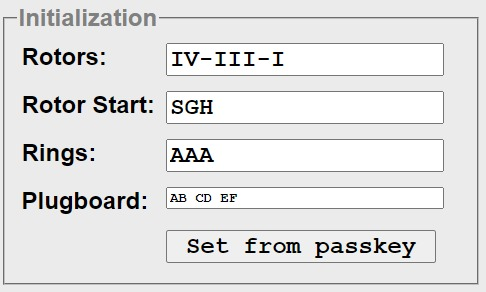

In [23]:
# encipher a message:
message = "TESTTESTTEST"
cipher_text=""
for letter in message:
    cipher_text = cipher_text + ENIGMA.encipher(letter)
print(cipher_text)

WKBXLDCLEQTY


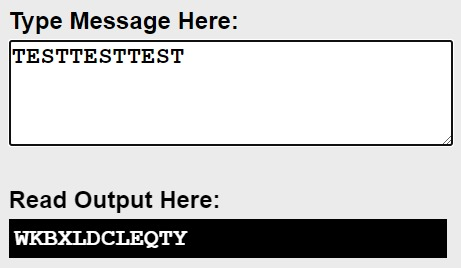

The results are the same

And now for the decryption of our message:

In [24]:
I = Rotor("EKMFLGDQVZNTOWYHXUSPAIBRCJ", "Q")
III = Rotor("BDFHJLCPRTXVZNYEIWGAKMUSQO", "V")
IV = Rotor("ESOVPZJAYQUIRHXLNFTGKDCMWB", "J")
ENIGMA = Enigma(B, IV, III, I, PB, KB)
ENIGMA.set_key("SGH") 

message = "WKBXLDCLEQTY"
cipher_text=""
for letter in message:
    cipher_text = cipher_text + ENIGMA.encipher(letter)
print(cipher_text)

TESTTESTTEST
